In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from advanced.advanced_grid_env import AdvGridWorldEnvSlow, AdvGridWorldEnvFast, AdvGridWorldEnv
from genetic import GAAgent
from mc import MonteCarloAgent
from q_learning import QLearningAgent
from sarsa import SarsaAgent

def plot_r_s(rewards_per_episode, steps_per_episode):
	# Plotting the rewards and steps over episodes
	plt.figure(figsize=(12, 5))

	plt.subplot(1, 2, 1)
	plt.plot(rewards_per_episode)
	plt.title('Total Rewards per Episode')
	plt.xlabel('Episode')
	plt.ylabel('Total Reward')

	plt.subplot(1, 2, 2)
	plt.plot(steps_per_episode)
	plt.title('Steps per Episode')
	plt.xlabel('Episode')
	plt.ylabel('Steps')

	plt.tight_layout()
	plt.show()

In [2]:
random_seed = 2022
np.random.seed(random_seed)
random.seed(random_seed)


height = 4
width = 4

state_size = height * width

num_episodes = 3000
max_steps_per_episode = 600

hangar = AdvGridWorldEnvSlow(height, width, 'material')

random_seed = 2021
np.random.seed(random_seed)
random.seed(random_seed)

warehouse = AdvGridWorldEnvSlow(height+2, width+2, 'clean')

random_seed = 2020
np.random.seed(random_seed)
random.seed(random_seed)

garage = AdvGridWorldEnvSlow(height, width, 'recharge')


In [3]:
def q_learning(env:AdvGridWorldEnv, state_size, num_episodes, max_steps_per_episode):
    action_size = len(env.actions)
    q_agent = QLearningAgent(env, state_size=state_size, action_size=action_size)

    rewards_per_episode = []
    steps_per_episode = []

    for episode in range(num_episodes):
        state = env.reset()  # Reset slow_environment at the start of each episode
        done = False
        total_reward = 0
        steps = 0

        for step in range(max_steps_per_episode):
            action = q_agent.choose_action(state)  # Choose an action based on current policy
            next_state, reward, done, _ = env.step(env.actions[action])

            q_agent.learn(state, action, reward, next_state, done)

            state = next_state
            total_reward += reward
            steps += 1

            if done:
                break

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)

        # if (episode + 1) % 100 == 0:
        #     print(f"Episode {episode + 1}/{num_episodes} - Total Reward: {total_reward}, Steps: {steps}, Epsilon: {q_agent.epsilon:.4f}")

    return rewards_per_episode, steps_per_episode, q_agent


def sarsa(env:AdvGridWorldEnv, state_size, num_episodes, max_steps_per_episode):
    action_size = len(env.actions)
    sarsa_agent = SarsaAgent(env, state_size=state_size, action_size=action_size)

    rewards_per_episode = []
    steps_per_episode = []

    for episode in range(num_episodes):
        state = env.reset()  # Reset environment
        action = sarsa_agent.choose_action(state)
        done = False
        total_reward = 0
        steps = 0

        for _ in range(max_steps_per_episode):
            next_state, reward, done, _ = env.step(env.actions[action])
            next_action = sarsa_agent.choose_action(next_state)
            
            sarsa_agent.learn(state, action, reward, next_state, next_action, done)

            state = next_state
            action = next_action
            total_reward += reward
            steps += 1

            if done:
                break

        rewards_per_episode.append(total_reward)
        steps_per_episode.append(steps)

        # if (episode + 1) % 100 == 0:
        #     print(f"Episode {episode + 1}/{num_episodes}: Reward = {total_reward}, Epsilon = {sarsa_agent.epsilon:.4f}")

    return rewards_per_episode, steps_per_episode, sarsa_agent


def genetic(env: AdvGridWorldEnv, population_size: int = 50, chromosome_length: int = 20, mutation_rate: float = 0.1, elitism_count: int = 2, generations: int = 100):
    agent = GAAgent(env, population_size=population_size, chromosome_length=chromosome_length, mutation_rate=mutation_rate, elitism_count=elitism_count)
    best_fitness_per_generation = agent.run(generations=generations)
    
    # Evaluate the best chromosome
    # best_chromosome = max(agent.population, key=agent.evaluate_fitness)
    # env.reset()
    # # env.render()
    # for action in best_chromosome:
    #     env.step(action)
        # env.render()
        # print()
    # env.render()
    # print("Best Chromosome:", best_chromosome)
    # print("Best Fitness:", agent.evaluate_fitness(best_chromosome))
    
    return best_fitness_per_generation, agent


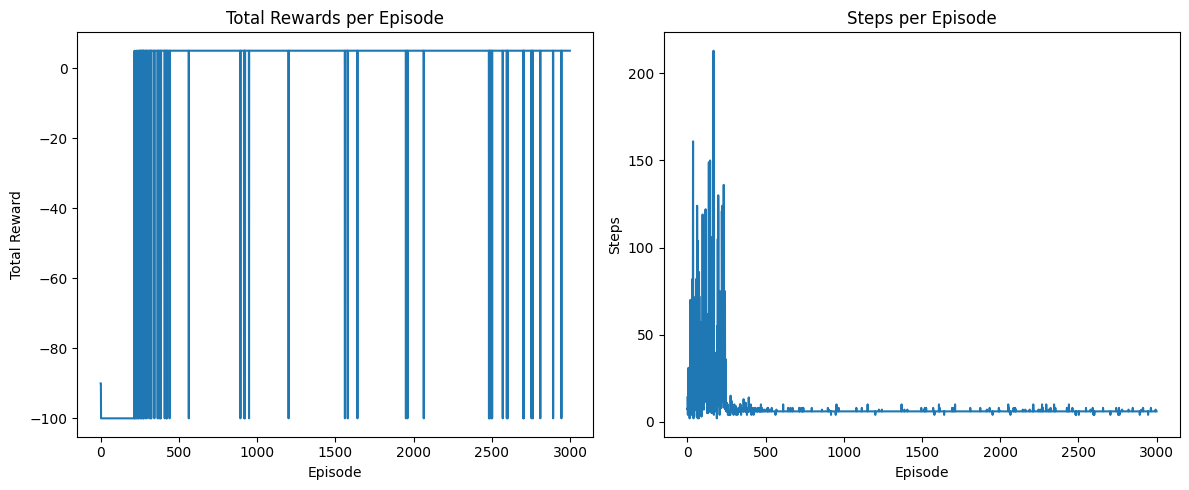

In [4]:

rewards_per_episode, steps_per_episode, q_agent = q_learning(hangar, state_size, num_episodes, max_steps_per_episode)
plot_r_s(rewards_per_episode, steps_per_episode)

In [5]:
slow_q_learned_policy = q_agent.policy()
print("Learned Q-learning Policy:")
hangar.print_policy(slow_q_learned_policy)
hangar.print_board()

Learned Q-learning Policy:
+---+---+---+---+
| → | ↓ | ↓ | ← |
+---+---+---+---+
| → | ↓ | ← | X |
+---+---+---+---+
| X | → | → | ↓ |
+---+---+---+---+
| X | X | → | T |
+---+---+---+---+

+---+---+---+---+
| . | . | . | . |
+---+---+---+---+
| ⚙ | ⚙ | . | X |
+---+---+---+---+
| X | . | . | . |
+---+---+---+---+
| X | X | . | H |
+---+---+---+---+



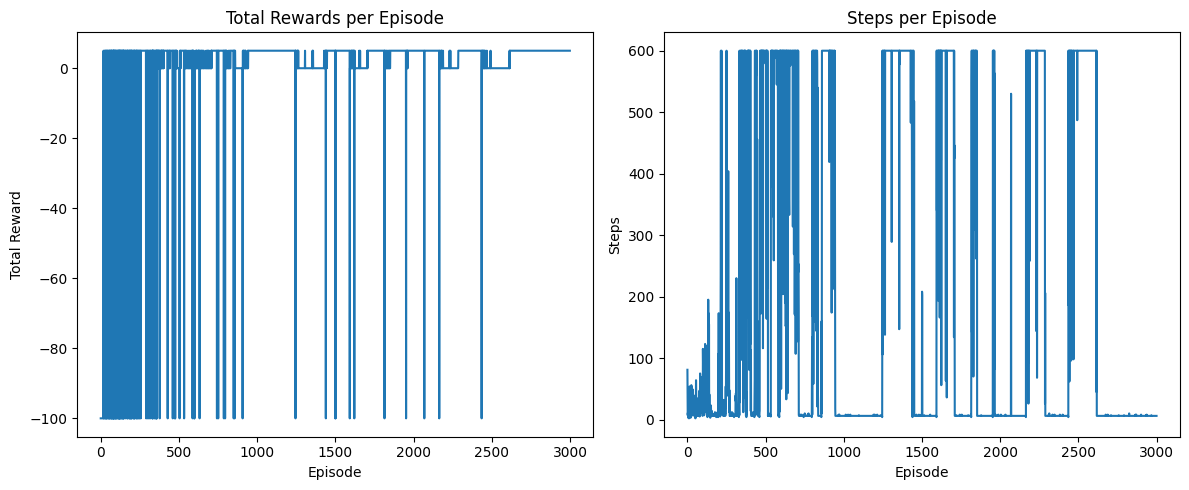

In [6]:
rewards_per_episode, steps_per_episode, sarsa_agent = sarsa(hangar, state_size, num_episodes, max_steps_per_episode)
plot_r_s(rewards_per_episode, steps_per_episode)

In [7]:
slow_sarsa_learned_policy = sarsa_agent.policy()
print("Learned Q-learning Policy:")
hangar.print_policy(slow_sarsa_learned_policy)
hangar.print_board()

Learned Q-learning Policy:
+---+---+---+---+
| → | → | ↓ | ← |
+---+---+---+---+
| ↑ | ↑ | ↓ | X |
+---+---+---+---+
| X | → | → | ↓ |
+---+---+---+---+
| X | X | → | T |
+---+---+---+---+

+---+---+---+---+
| . | . | . | . |
+---+---+---+---+
| ⚙ | ⚙ | . | X |
+---+---+---+---+
| X | . | . | . |
+---+---+---+---+
| X | X | . | H |
+---+---+---+---+



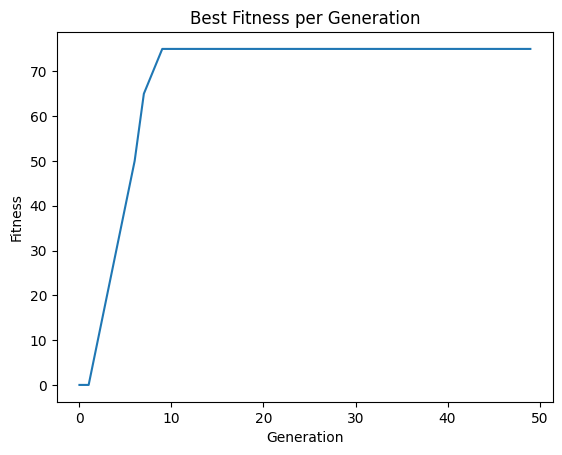

In [22]:
hangar.reset()
best_fitness_per_generation, genetic_agent = genetic(hangar, population_size=50, chromosome_length=20, mutation_rate=0.1, elitism_count=2, generations=50)
# Plot the best fitness per generation
plt.plot(best_fitness_per_generation)
plt.title('Best Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

In [23]:
hangar.print_policy(genetic_agent.policy())
hangar.print_board()

+---+---+---+---+
| ↓ | ← | ← | ← |
+---+---+---+---+
| → | ↓ | ← | X |
+---+---+---+---+
| X | → | ↓ | ← |
+---+---+---+---+
| X | X | → | T |
+---+---+---+---+

+---+---+---+---+
| . | . | . | . |
+---+---+---+---+
| ⚙ | ⚙ | . | X |
+---+---+---+---+
| X | . | . | . |
+---+---+---+---+
| X | X | . | H |
+---+---+---+---+



# Warehouse

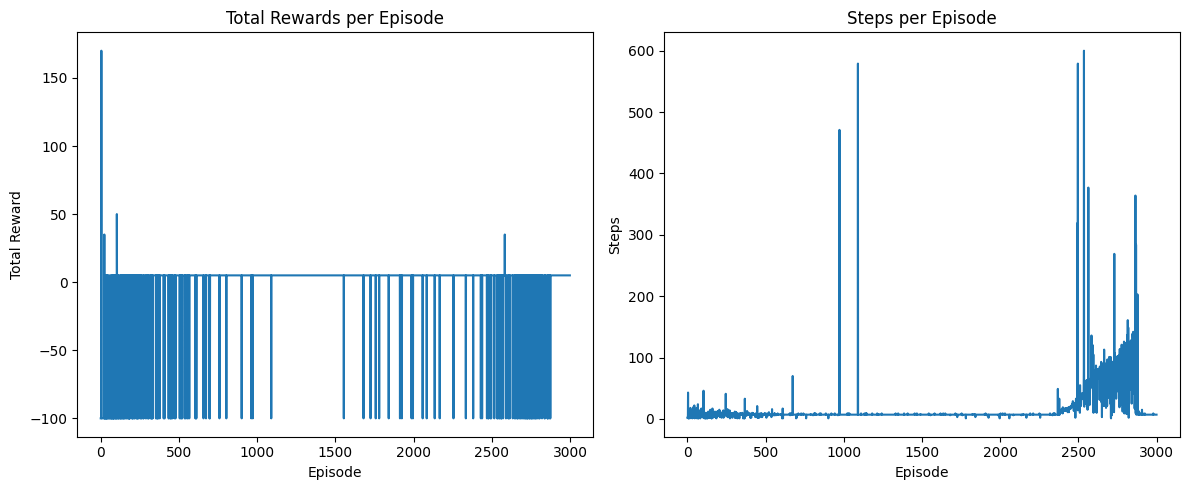

In [10]:
rewards_per_episode, steps_per_episode, q_agent = q_learning(warehouse, (height+2) * (width+2), num_episodes, max_steps_per_episode)
plot_r_s(rewards_per_episode, steps_per_episode)

In [11]:
slow_q_learned_policy = q_agent.policy()
print("Learned Q-learning Policy:")
warehouse.print_policy(slow_q_learned_policy)
warehouse.print_board()

Learned Q-learning Policy:
+---+---+---+---+---+---+
| ↓ | X | → | ↓ | X | T |
+---+---+---+---+---+---+
| → | → | → | → | → | ↑ |
+---+---+---+---+---+---+
| X | ↑ | ↓ | ↑ | X | ↑ |
+---+---+---+---+---+---+
| ↓ | ↑ | ↓ | X | X | X |
+---+---+---+---+---+---+
| ↑ | ↑ | ← | ← | ← | ← |
+---+---+---+---+---+---+
| X | ← | → | ↑ | ↑ | X |
+---+---+---+---+---+---+

+---+---+---+---+---+---+
| o | X | ! | ! | X | E |
+---+---+---+---+---+---+
| ! | ! | ! | ! | ! | ! |
+---+---+---+---+---+---+
| X | ! | ! | ! | X | ! |
+---+---+---+---+---+---+
| ! | ! | ! | X | X | X |
+---+---+---+---+---+---+
| ! | ! | ! | ! | ! | ! |
+---+---+---+---+---+---+
| X | ! | ! | ! | ! | X |
+---+---+---+---+---+---+



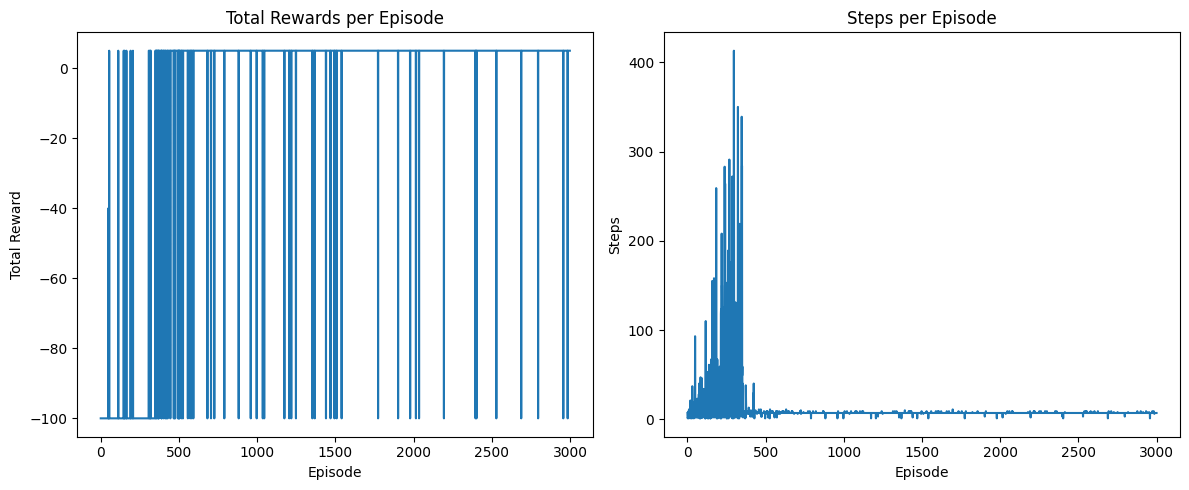

In [12]:
rewards_per_episode, steps_per_episode, sarsa_agent = sarsa(warehouse, (height+2) * (width+2), num_episodes, max_steps_per_episode)
plot_r_s(rewards_per_episode, steps_per_episode)

In [13]:
slow_sarsa_learned_policy = sarsa_agent.policy()
print("Learned Q-learning Policy:")
warehouse.print_policy(slow_sarsa_learned_policy)
warehouse.print_board()

Learned Q-learning Policy:
+---+---+---+---+---+---+
| ↓ | X | ↓ | ↓ | X | T |
+---+---+---+---+---+---+
| → | → | → | → | → | ↑ |
+---+---+---+---+---+---+
| X | ↑ | ↑ | ↑ | X | ↑ |
+---+---+---+---+---+---+
| ← | ↑ | ↓ | X | X | X |
+---+---+---+---+---+---+
| ↑ | ← | ← | ← | ← | → |
+---+---+---+---+---+---+
| X | → | ↑ | ↓ | ↑ | X |
+---+---+---+---+---+---+

+---+---+---+---+---+---+
| o | X | ! | ! | X | E |
+---+---+---+---+---+---+
| ! | ! | ! | ! | ! | ! |
+---+---+---+---+---+---+
| X | ! | ! | ! | X | ! |
+---+---+---+---+---+---+
| ! | ! | ! | X | X | X |
+---+---+---+---+---+---+
| ! | ! | ! | ! | ! | ! |
+---+---+---+---+---+---+
| X | ! | ! | ! | ! | X |
+---+---+---+---+---+---+



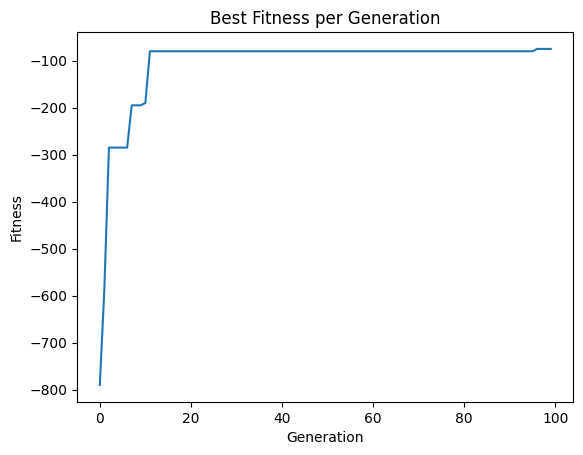

In [14]:
best_fitness_per_generation, genetic_agent = genetic(warehouse, population_size=300, chromosome_length=100, mutation_rate=0.1, elitism_count=2, generations=100)
# Plot the best fitness per generation
plt.plot(best_fitness_per_generation)
plt.title('Best Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

In [15]:
warehouse.print_policy(genetic_agent.policy())
warehouse.print_board()

+---+---+---+---+---+---+
| → | X | ← | ← | X | T |
+---+---+---+---+---+---+
| ← | ← | ← | ← | ← | ← |
+---+---+---+---+---+---+
| X | ← | ← | ← | X | ← |
+---+---+---+---+---+---+
| ← | ← | ← | X | X | X |
+---+---+---+---+---+---+
| ← | ← | ← | ← | ← | ← |
+---+---+---+---+---+---+
| X | ← | ← | ← | ← | X |
+---+---+---+---+---+---+

+---+---+---+---+---+---+
| o | X | ! | ! | X | E |
+---+---+---+---+---+---+
| ! | ! | ! | ! | ! | ! |
+---+---+---+---+---+---+
| X | ! | ! | ! | X | ! |
+---+---+---+---+---+---+
| ! | ! | ! | X | X | X |
+---+---+---+---+---+---+
| ! | ! | ! | ! | ! | ! |
+---+---+---+---+---+---+
| X | ! | ! | ! | ! | X |
+---+---+---+---+---+---+



# Garage

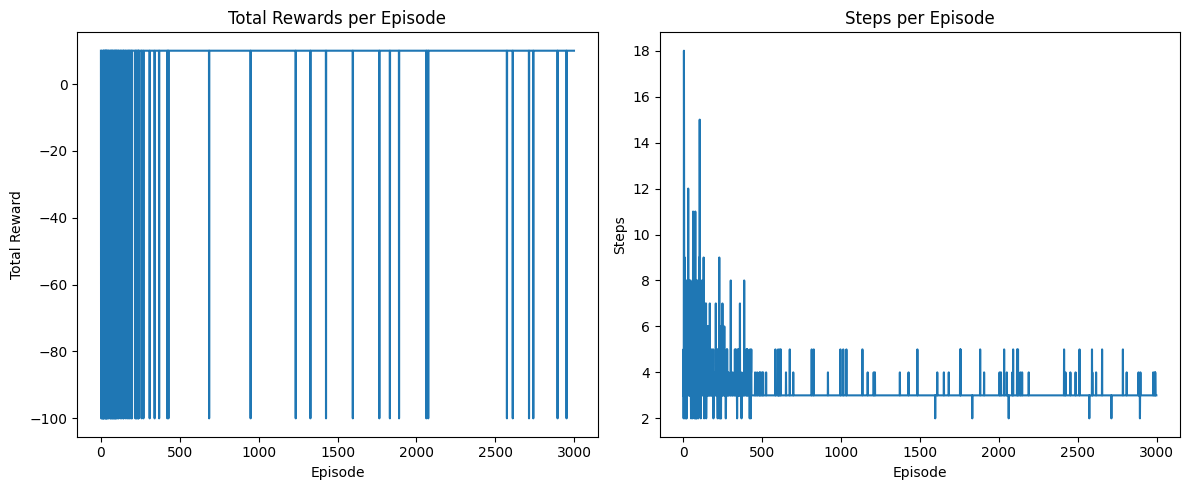

In [16]:
rewards_per_episode, steps_per_episode, q_agent = q_learning(garage, state_size, num_episodes, max_steps_per_episode)
plot_r_s(rewards_per_episode, steps_per_episode)

In [17]:
slow_q_learned_policy = q_agent.policy()
print("Learned Q-learning Policy:")
garage.print_policy(slow_q_learned_policy)
garage.print_board()

Learned Q-learning Policy:
+---+---+---+---+
| X | ↑ | ↑ | ↑ |
+---+---+---+---+
| ↓ | X | ↑ | ↑ |
+---+---+---+---+
| ↓ | X | ↑ | ↑ |
+---+---+---+---+
| → | → | ↑ | X |
+---+---+---+---+

+---+---+---+---+
| X | . | . | . |
+---+---+---+---+
| . | X | . | ⌁ |
+---+---+---+---+
| . | X | ⌁ | . |
+---+---+---+---+
| o | . | . | X |
+---+---+---+---+



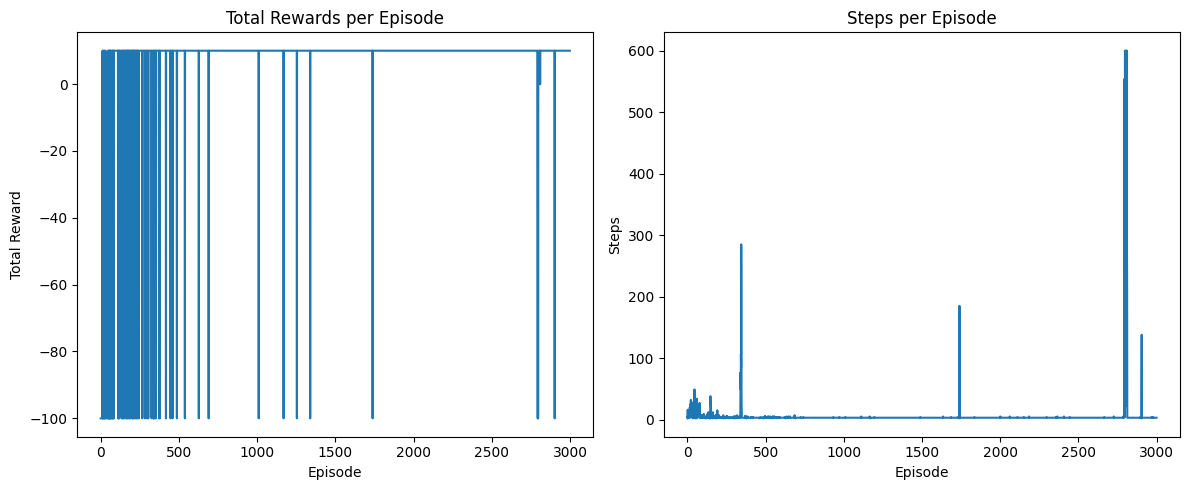

In [18]:
rewards_per_episode, steps_per_episode, sarsa_agent = sarsa(garage, state_size, num_episodes, max_steps_per_episode)
plot_r_s(rewards_per_episode, steps_per_episode)

In [19]:
slow_sarsa_learned_policy = sarsa_agent.policy()
print("Learned Q-learning Policy:")
garage.print_policy(slow_sarsa_learned_policy)
garage.print_board()

Learned Q-learning Policy:
+---+---+---+---+
| X | ↑ | ↑ | ↑ |
+---+---+---+---+
| ↓ | X | ↑ | ↑ |
+---+---+---+---+
| ↓ | X | ↑ | ↑ |
+---+---+---+---+
| → | → | ↑ | X |
+---+---+---+---+

+---+---+---+---+
| X | . | . | . |
+---+---+---+---+
| . | X | . | ⌁ |
+---+---+---+---+
| . | X | ⌁ | . |
+---+---+---+---+
| o | . | . | X |
+---+---+---+---+



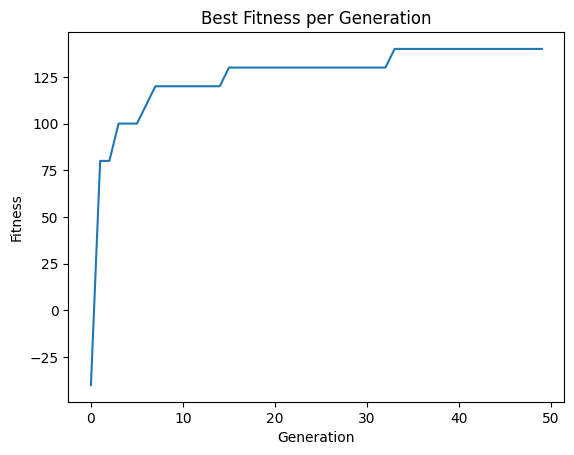

In [20]:
best_fitness_per_generation, genetic_agent = genetic(garage, population_size=50, chromosome_length=20, mutation_rate=0.1, elitism_count=2, generations=50)
# Plot the best fitness per generation
plt.plot(best_fitness_per_generation)
plt.title('Best Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

In [21]:
garage.print_policy(genetic_agent.policy())
garage.print_board()

+---+---+---+---+
| X | ↓ | ↓ | ↓ |
+---+---+---+---+
| ↓ | X | ↓ | ↓ |
+---+---+---+---+
| ↓ | X | ↓ | ↓ |
+---+---+---+---+
| → | → | ↑ | X |
+---+---+---+---+

+---+---+---+---+
| X | . | . | . |
+---+---+---+---+
| . | X | . | ⌁ |
+---+---+---+---+
| . | X | ⌁ | . |
+---+---+---+---+
| o | . | . | X |
+---+---+---+---+

